## Research assignment 2

[Carmen Salazar]

[A Mixed-Methods Approach to Gentrification] 

[02/14/2020]

### 1. Write a paragraph about your hypotheses

#My research question aims to explore the relationship between race and class turnover and public and private neighborhood investment. Because gentrification refers to a temporal and spatial process of renovation and reinvestment, we have been using qualitative Google Street View to observe the panoramic views of blocks within census tracts of interest, in an effort to determine if gentrification is captured in Washington D.C. Here I use census data and focus on median household income (independent variable) and the race category of "white alone" (also an independent variable). My control variable here is race, i think it will show an intervening relationship because being white may influence median household income (whiteness is related to higher levels of income). *This response changed after i recieved help from Dr. Eaton in regards to my dataset

1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

### 1. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [2]:
cd "/Users/karminsalazar/Desktop/Masters Thesis"
capture log close
*log using research_assignment2_log20200218.log


/Users/karminsalazar/Desktop/Masters Thesis



In [3]:
import delimited nhgis0004_ds233_20175_2017_tract.csv, clear

(273 vars, 179 obs)


In [4]:
describe


Contains data
  obs:           179                          
 vars:           273                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
gisjoin         str14   %14s                  GISJOIN
year            str9    %9s                   YEAR
state           str20   %20s                  STATE
statea          byte    %8.0g                 STATEA
county          str20   %20s                  COUNTY
countya       

### 2. Browse the data

Do the following in separate cells. Do do these in separate cells, you will need to use the right click "split cell" option:

1. Use "describe" to print details about the dataset
2. Print the heads and tables of the data using the appropriate magic
3. label the unique identifier variable
4. Generate a frequency table to show the N for each unit of time if there is data for multiple units in time
5. Check for missing data overall and within key categories of analysis (time, independent or dependent variable categories, etc)
6. use summarize to create a table with summary statistics for each variable you plan to analyze

In [5]:
set more off
keep census_tract total_pop* race_total* whitealone* v71-v85 total_households_ah1me001

In [6]:
egen over100k= rowtotal(v82	v83	v84	v85)

In [7]:
gen pctover100k=over100k/total_households_ah1me001

(1 missing value generated)


In [8]:
%head census_tract over100k pctover100k

,census_tract,over100k,pctover100k
1,"Census Tract 1, District of Columbia, District...",1845,.74666125
2,"Census Tract 2.01, District of Columbia, Distr...",0,.
3,"Census Tract 2.02, District of Columbia, Distr...",1076,.69285256
4,"Census Tract 3, District of Columbia, District...",1559,.62736416
5,"Census Tract 4, District of Columbia, District...",361,.59669423
6,"Census Tract 5.01, District of Columbia, Distr...",1152,.58596134
7,"Census Tract 5.02, District of Columbia, Distr...",1055,.65244281
8,"Census Tract 6, District of Columbia, District...",1677,.78401124
9,"Census Tract 7.01, District of Columbia, Distr...",1513,.44213909
10,"Census Tract 7.02, District of Columbia, Distr...",666,.30149388


In [9]:
gen pctwhitealone=whitealone/total_households_ah1me001

(1 missing value generated)


In [10]:
%head census_tract whitealone pctover100k

,census_tract,whitealone_ahy2e002,pctover100k
1,"Census Tract 1, District of Columbia, District...",4665,.74666125
2,"Census Tract 2.01, District of Columbia, Distr...",2659,.
3,"Census Tract 2.02, District of Columbia, Distr...",3680,.69285256
4,"Census Tract 3, District of Columbia, District...",5230,.62736416
5,"Census Tract 4, District of Columbia, District...",1202,.59669423
6,"Census Tract 5.01, District of Columbia, Distr...",3073,.58596134
7,"Census Tract 5.02, District of Columbia, Distr...",2855,.65244281
8,"Census Tract 6, District of Columbia, District...",4086,.78401124
9,"Census Tract 7.01, District of Columbia, Distr...",4388,.44213909
10,"Census Tract 7.02, District of Columbia, Distr...",2556,.30149388


In [11]:
drop if whitealone==.
drop if over100k==.


(0 observations deleted)

(0 observations deleted)


In [12]:
sum whitealone over100k


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
whitealo~002 |        179    1527.771     1524.54          0       6508
    over100k |        179    628.9162    512.1231          0       2591


### 3. Write a note summarizing what you learned from browsing the data

[your note here]

#The variable column presents which variables are being described, whitealone and over100k of income dollars, both of which have 179 observations. This colum on observations includes only valid (not missing) number of observations for that variable. The mean is the arithmetic mean across the observations. The average number of total whites alone is 1527.771. The avaerage total of individuals making over 100k dollars in income is 628.9162. The Std.Dev.ob the variables present the spread of the distriution of the variable.

### 4. Create univariate histograms of interval ratio variables you plan to analyze.

Write at least 3 forloops to generate histograms for all the variables you plan to analyze. Create titles for each histogram that notes whether it is a dependent, independent, or control variable (you can also note in titles whether control vars control for spurious, intervening, or interactive relationships). Begin with your dependent variables. Then make a note below to describe the shapes of the distributions and their implications for your study.

[*The histograms below are skewed right distibutions.]


(bin=10, start=0, width=650.8)


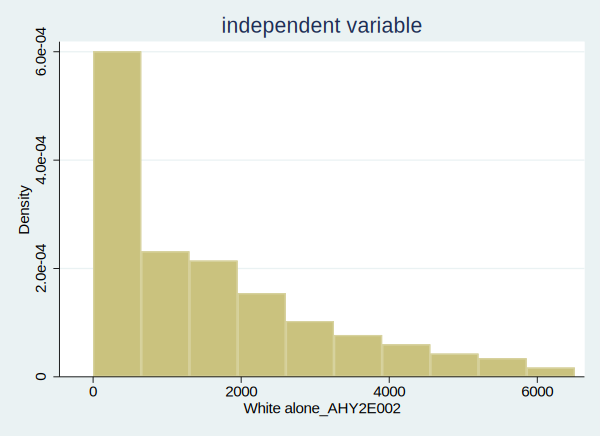



. foreach var in over100k {
(bin=10, start=0, width=259.1)


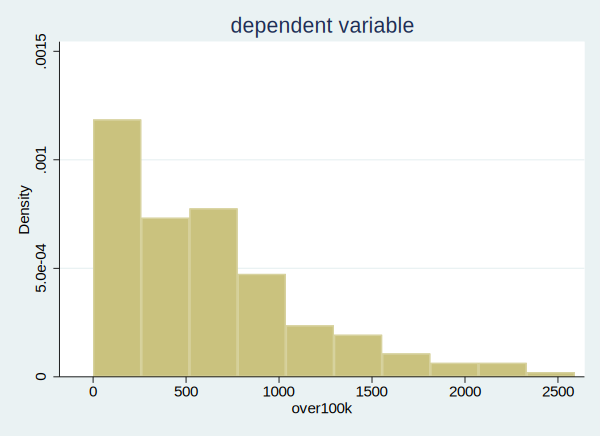

In [13]:
foreach var in whitealone {
    histogram `var' if `var'<20000, title(independent variable) name(`var', replace) bin(10)
}

foreach var in over100k {
    histogram `var' if `var'<20000, title(dependent variable) name(`var', replace) bin(10)
}

### 5. Create univariate count and % frequency tables for all categorical (nominal) variables you plan to analyze

Again, use forloops. Then write a note below with a narrative summary of the distributions and their implications for your study.




(bin=14, start=0, width=500)


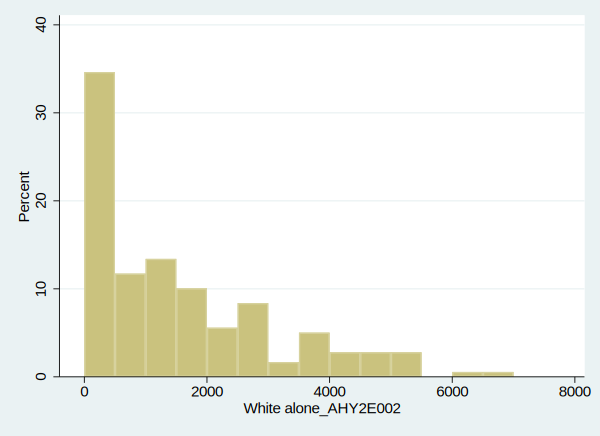





------------------------
White     |
alone_AHY |
2E002     | sum(ov~100k)
----------+-------------
        0 |          793
        2 |           57
        4 |          141
        9 |          269
       16 |           99
       21 |          218
       22 |           47
       23 |          104
       27 |          137
       30 |           30
       32 |           89
       35 |          106
       37 |          231
       41 |           81
       42 |          153
       44 |          154
       46 |           68
       47 |          148
       48 |          126
       49 |           68
       53 |          184
       59 |          231
       60 |           62
       62 |           95
       63 |           53
       72 |           40
       86 |          195
       96 |          238
       99 |          189
      118 |          240
      122 |          105
      125 |          467
      129 |          135
      139 |          253
      144 |          220
      151 |          3

In [14]:
hist whitealone, percent width (500) start(0) 
table whitealone, c(sum over100k) format(%12.0fc)

### 6. Make a relevant bivariate table and graph for your study

Make the appropriate a) bivariate table and b) graph dependening on whether your dependent variable is nominal/categorical or interval ratio. If your dependent variable is nominal, make sure it is the row variable in the table. If your independent variable is interval ratio, convert it into an ordinal variable by creating a new variable with 3 to 5 categories each with an equal range of the interval ratio variable. Then use the new ordinal variable as your independent variable in the bivariate table and graph.

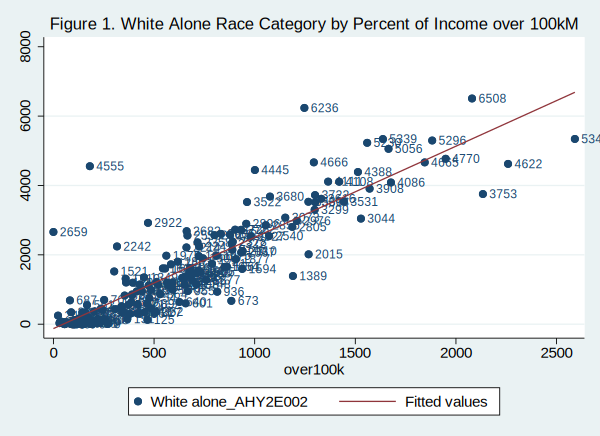

In [31]:
twoway (scatter whitealone over100k, mlabel(whitealone) subtitle("Figure 1. White Alone Race Category by Percent of Income over 100kM")) (lfit whitealone over100k)


### 7. Create partial bivariate tables and graphs

For the bivariate table and graph you made for problem 6, split both into partial tables and graphs using one of your nominal/categorical control variables. If your control variable is interval ratio, convert it into an ordinal variable by creating a variable with 3 to 5 categories each with an equal range of the interval ratio variable.  Then use the new ordinal variable as your control variable to create the partial tables and graphs.

In [40]:
*tab whitealone over100k, exp chi2 cchi2 (*too many values appears everytime i attempt to run my codes)

### Interpret of your bivariate and partial tables and graphs

Is there a relationship between your dependent and independent variables? Is it weak, strong, or non-existent? Do adding controls reveal any spurious, intervening, or interactive relationships? Do they conform with your hypotheses? If not, do you have any ideas for why and how you might test the reason why?

*I am almost certain i did not do something right because i am getting the response of "too many values. However, the current relationship I think is present is a strong linear positive relationship between my variables. I think that if added controls, it would reveal an interactive relationship where variables would interact to produce different levels of outcomes. 